# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### **Tensorflow**
TensorFlow is an open-source library developed by Google primarily for deep learning applications. It also supports traditional machine learning. TensorFlow was originally developed for large numerical computations without keeping deep learning in mind. However, it proved to be very useful for deep learning development as well, and therefore Google open-sourced it.
TensorFlow accepts data in the form of multi-dimensional arrays of higher dimensions called tensors. Multi-dimensional arrays are very handy in handling large amounts of data.
#### **Keras**
Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.                        Keras is relatively easy to learn and work with because it provides a python frontend with a high level of abstraction while having the option of multiple back-ends for computation purposes. This makes Keras slower than other deep learning frameworks, but extremely beginner-friendly.
#### **LSTM**
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the Tesla stock price data
df = pd.read_csv('/content/Tesla_raw_data.csv')
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,6/29/2010,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,6/30/2010,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,7/1/2010,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,7/2/2010,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,7/6/2010,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [4]:
# Extract the 'Close' prices as the target variable
data = df['close'].values.reshape(-1, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3322 non-null   object 
 1   open            3322 non-null   float64
 2   high            3322 non-null   float64
 3   low             3322 non-null   float64
 4   close           3322 non-null   float64
 5   volume          3322 non-null   int64  
 6   adjusted_close  3322 non-null   float64
 7   change_percent  3321 non-null   float64
 8   avg_vol_20d     3303 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 233.7+ KB


### Finding the null value

In [6]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

In [7]:
#  replace NaN values with zeros
df.fillna(0)

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,6/29/2010,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,0.00,0.0
1,6/30/2010,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,0.0
2,7/1/2010,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,0.0
3,7/2/2010,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,0.0
4,7/6/2010,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,0.0
...,...,...,...,...,...,...,...,...,...
3317,9/1/2023,257.2600,259.0794,242.0100,245.0100,132541594,245.0100,-5.06,112651344.2
3318,9/5/2023,245.0000,258.0000,244.8600,256.4900,129469602,256.4900,4.69,113569929.0
3319,9/6/2023,255.1350,255.3900,245.0600,251.9200,116959797,251.9200,-1.78,114585809.8
3320,9/7/2023,245.0700,252.8100,243.2650,251.4900,115312898,251.4900,-0.17,115271639.5


In [8]:
df.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3322.000000,3321.000000,3.303000e+03
mean,309.656139,316.512291,302.556364,309.716696,1.960849e+07,66.452163,0.216628,9.623270e+07
std,294.828884,302.956737,286.530087,295.027282,3.627605e+07,99.129171,3.598838,6.460500e+07
min,16.140000,16.629900,14.979900,15.800100,1.186140e+05,1.053300,-21.060000,4.317139e+06
25%,142.419975,145.765050,139.197600,143.317575,3.104574e+06,9.980675,-1.560000,5.309270e+07
50%,234.415050,238.204950,229.548550,233.994900,6.501879e+06,16.710350,0.120000,8.762201e+07
75%,342.270000,347.755050,336.050025,342.389925,1.799560e+07,55.646525,1.940000,1.290431e+08
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08,409.970000,24.400000,3.886315e+08


In [9]:
df.shape

(3322, 9)

In [10]:
# Normalize the data between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [11]:
# Define a function to create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [12]:
# Set the sequence length (number of time steps to look back)
sequence_length = 20


In [13]:
# Create sequences and labels
X, y = create_sequences(data, sequence_length)

# Plotting the stock prices of Tesla

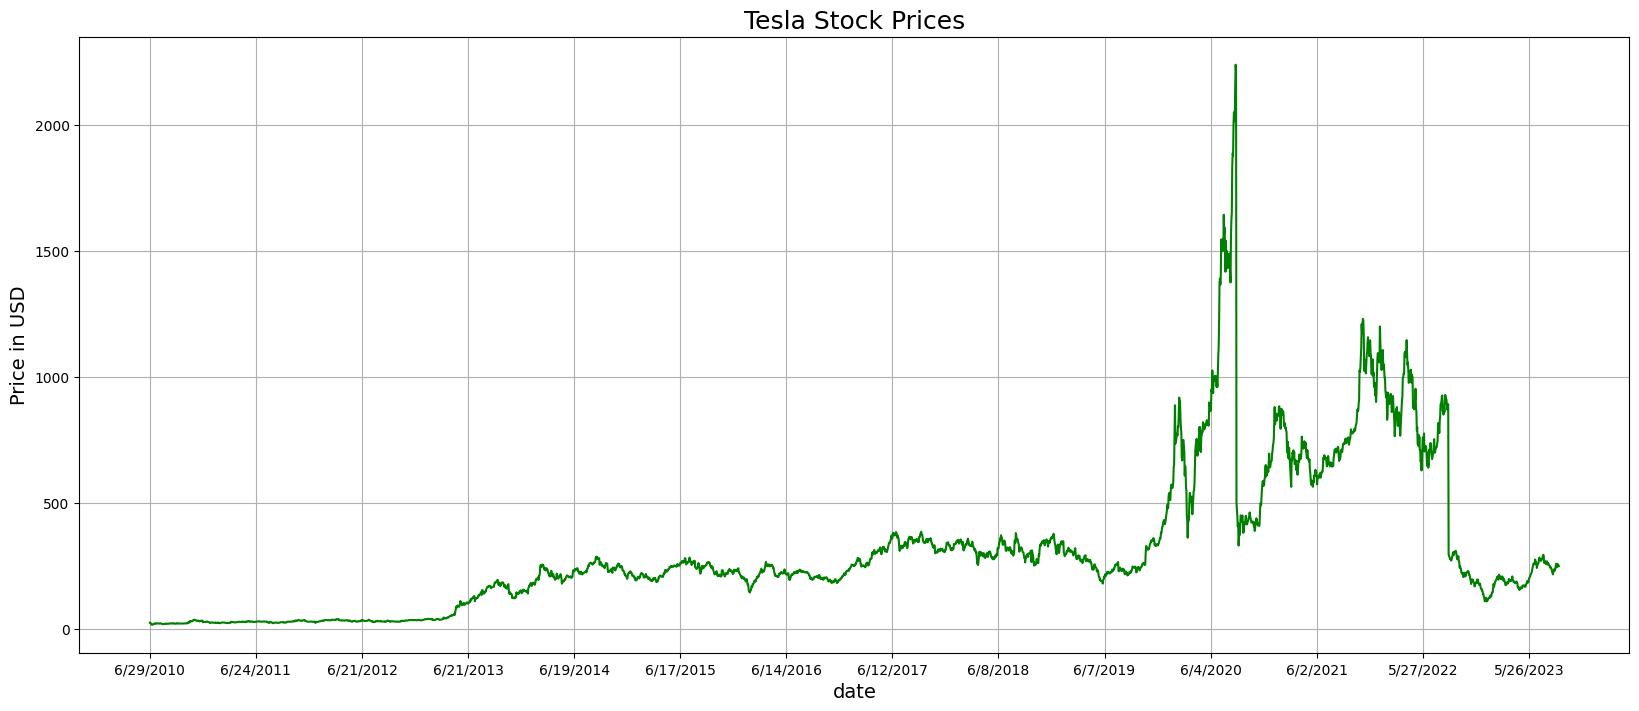

In [14]:
# Plotting the stock prices of Tesla
# Line plot

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['close'], color='green')  # Use df.index for the date and 'Close' for the closing prices
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('date', fontsize=14)  # Correct the label to 'Date'
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Prices', fontsize=18)
plt.grid()
plt.show()



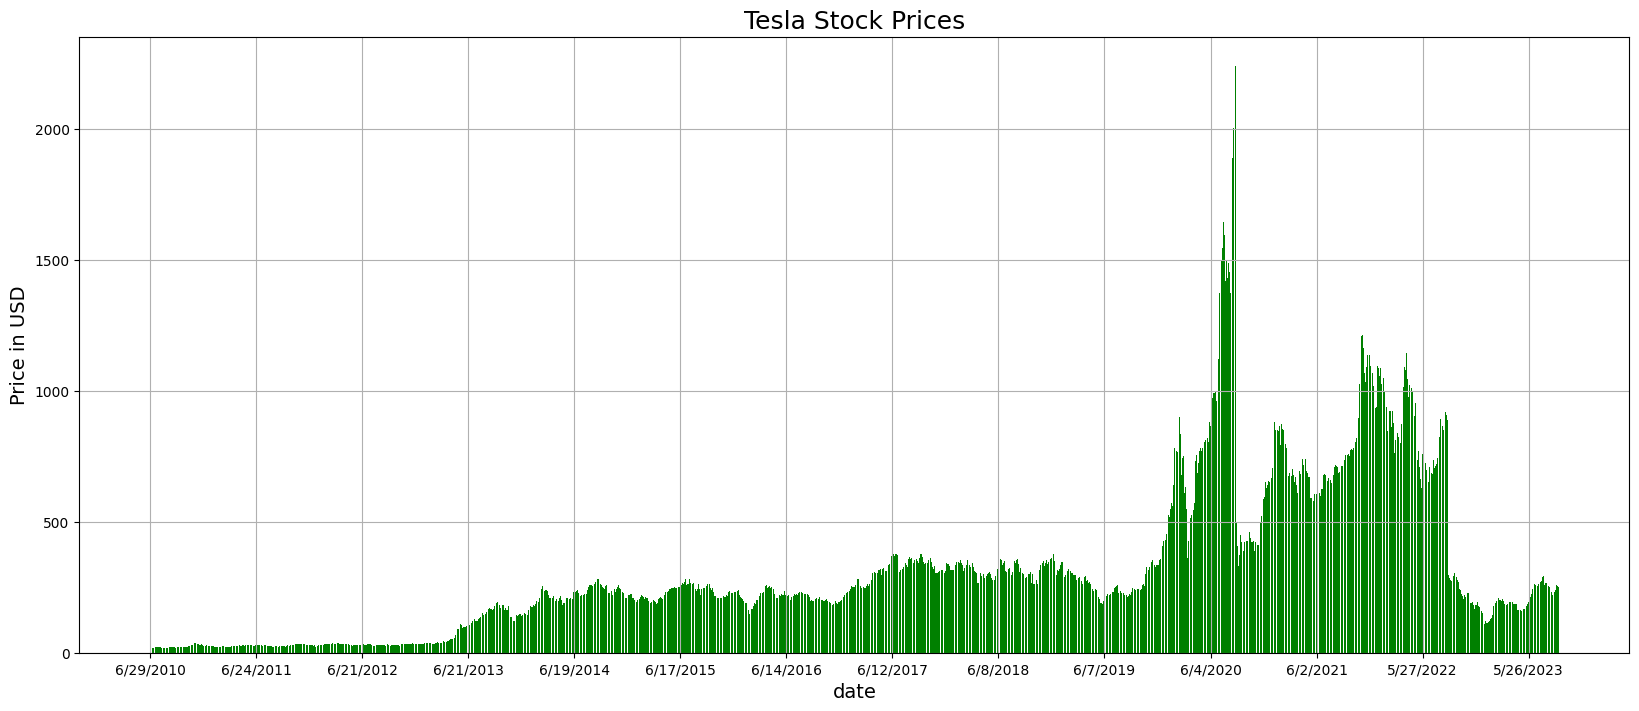

In [15]:
# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Prices', fontsize=18)
plt.grid()
plt.show()

# Volume Visualization

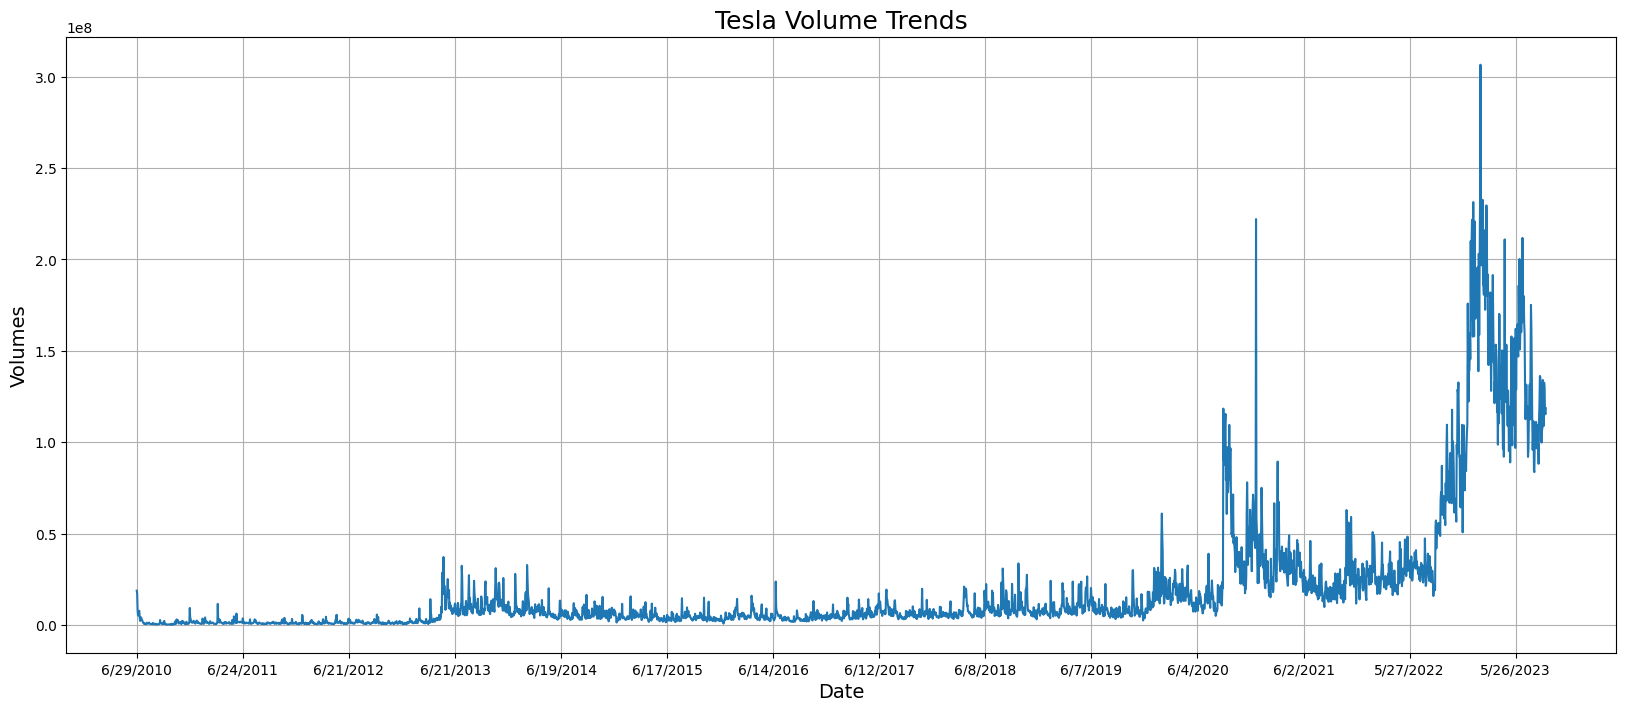

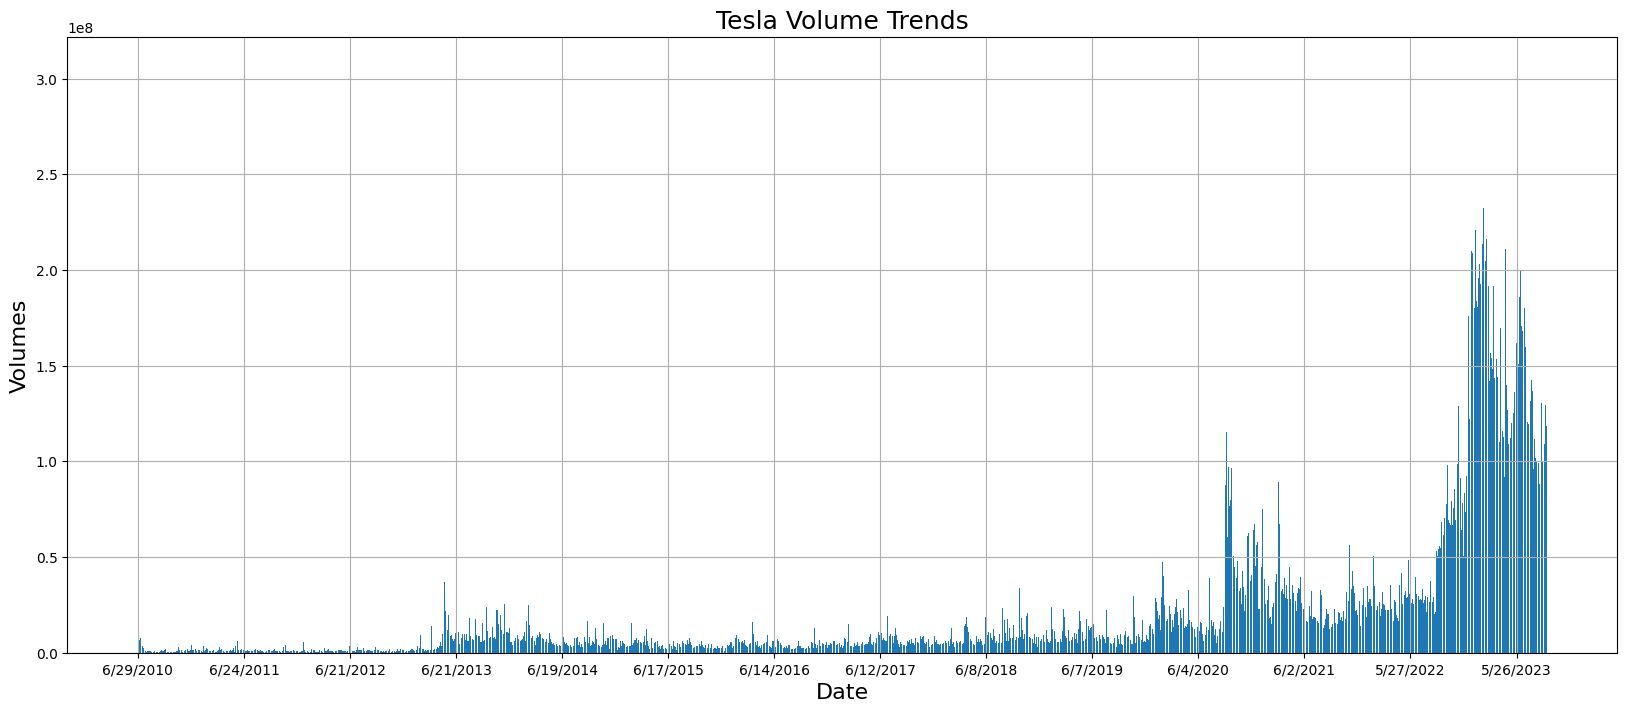

In [16]:
# Plotting the volume trends of Tesla stock

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volumes', fontsize=14)
plt.title('Tesla Volume Trends', fontsize=18)
plt.grid()
plt.show()

# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Volumes', fontsize=16)
plt.title('Tesla Volume Trends', fontsize=18)
plt.grid()
plt.show()

# Volatility
Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured from either the standard deviation or variance between returns from that same security or market index.
In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than one percent over a sustained period of time, it is called a volatile market. An asset's volatility is a key factor when pricing options contracts.

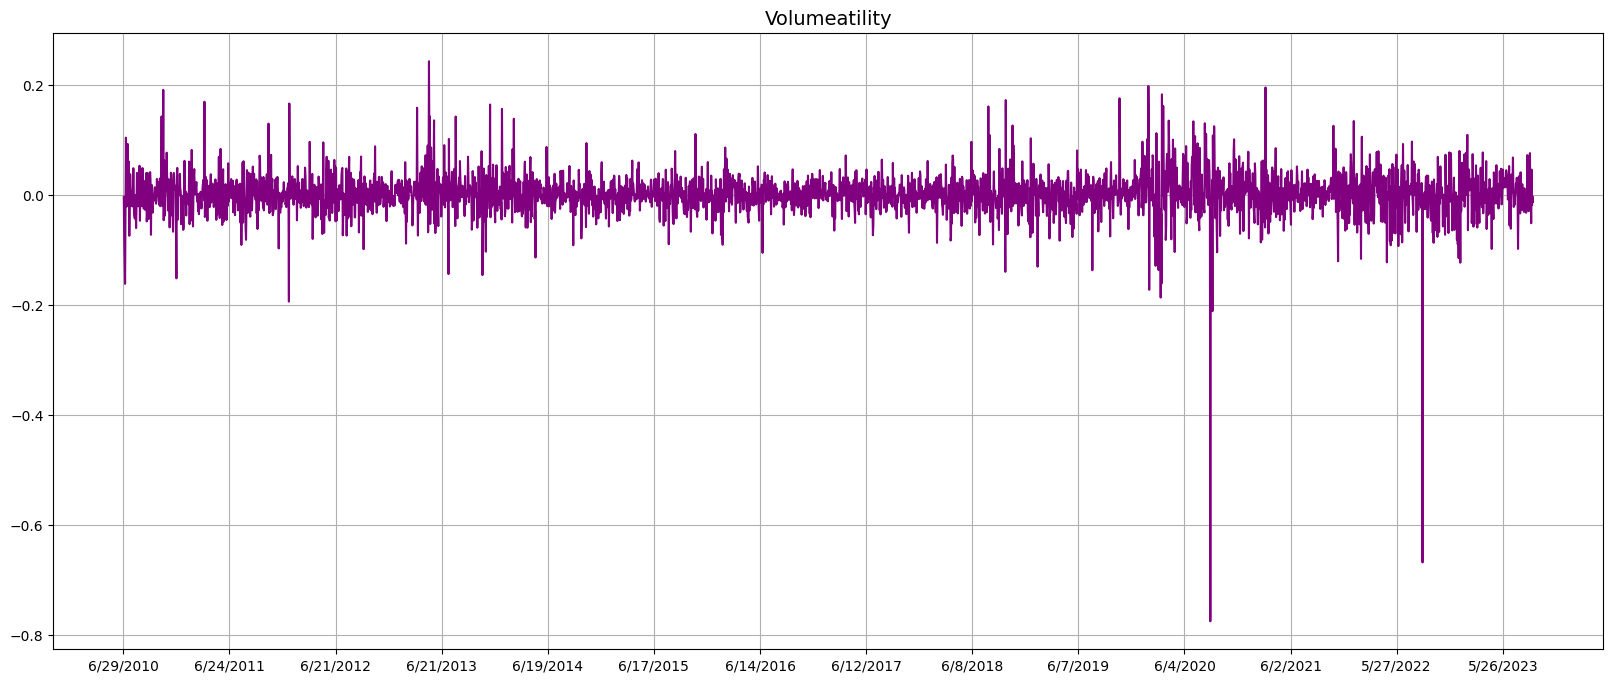

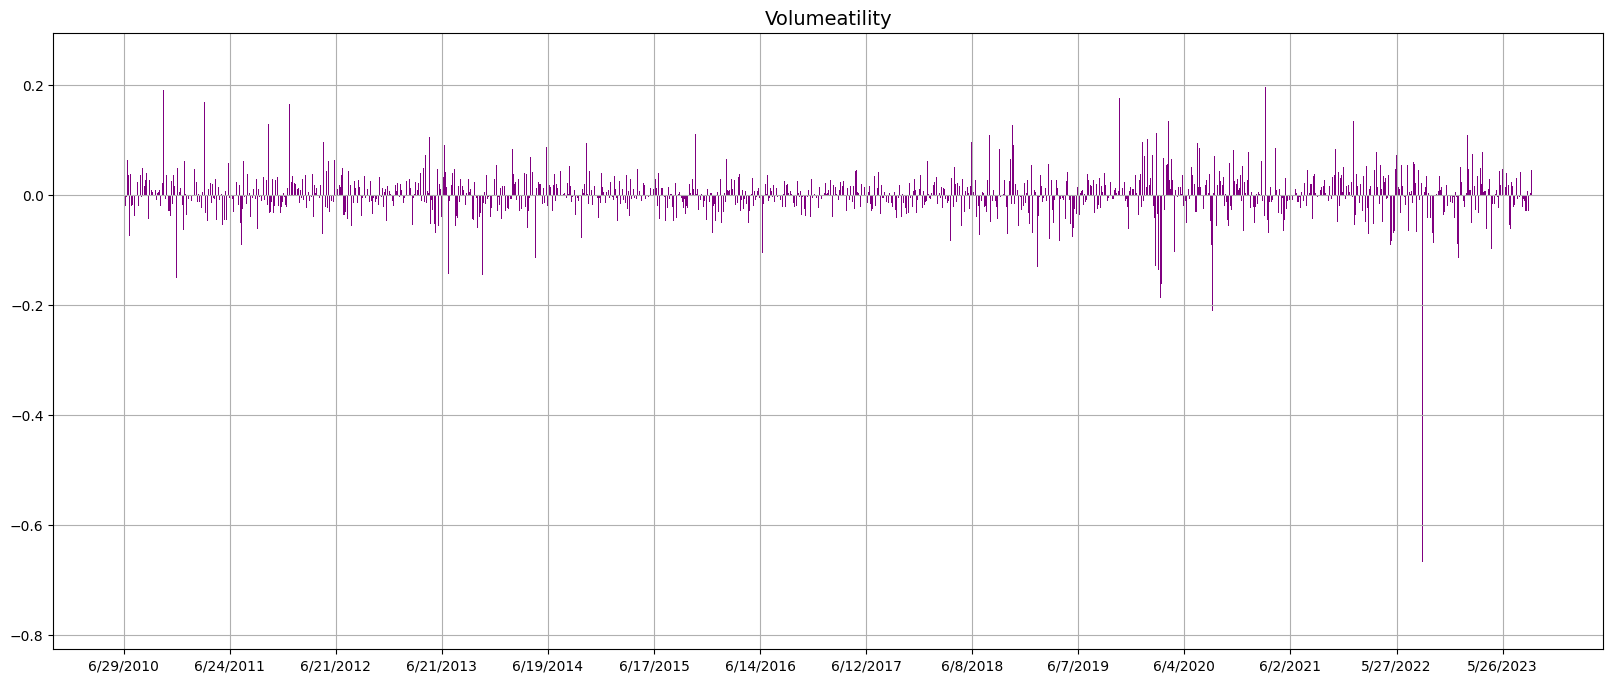

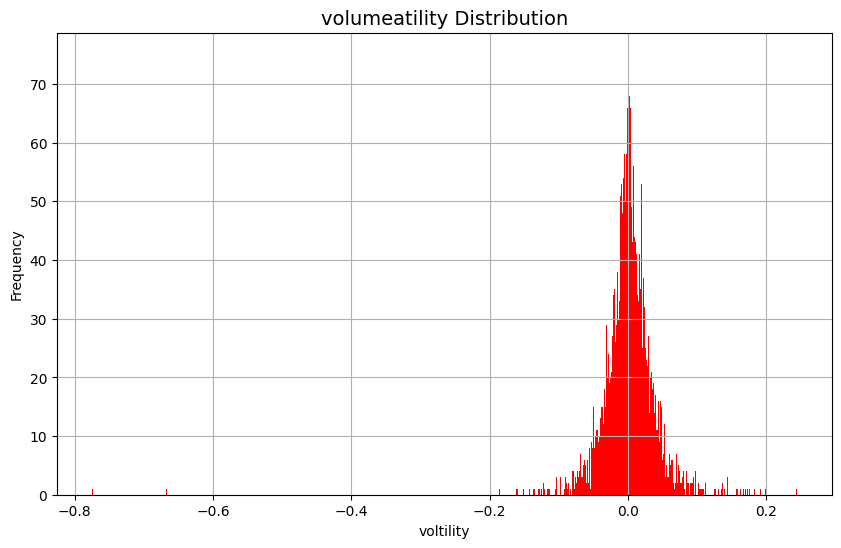

In [17]:
# Calculate the daily volumeatility
df['volume'] = (df['close'] / df['close'].shift(1)) - 1

# Create the line plot for volumeatility
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['volume'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volumeatility', fontsize=14)
plt.grid()
plt.show()

# Create the bar plot for volumeatility
fig1, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['volume'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volumeatility', fontsize=14)
plt.grid()
plt.show()

# Create the histogram for volumeatility
plt.figure(figsize=(10, 6))
df['volume'].hist(bins=1000, color='red')
plt.title('volumeatility Distribution', fontsize=14)
plt.xlabel('voltility')
plt.ylabel('Frequency')
plt.show()

# Cumulative Return
A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage, and it is the raw mathematical return of the following calculation:

**(Current Price of Securit - Original Price of Security)/Original Price of Security**

The cumulative return of an asset that does not have interest or dividends is easily calculated by figuring out the amount of profit or loss over the original price. That can work well with assets like precious metals and growth stocks that do not issue dividends. In these cases, one can use the raw closing price to calculate the cumulative return.

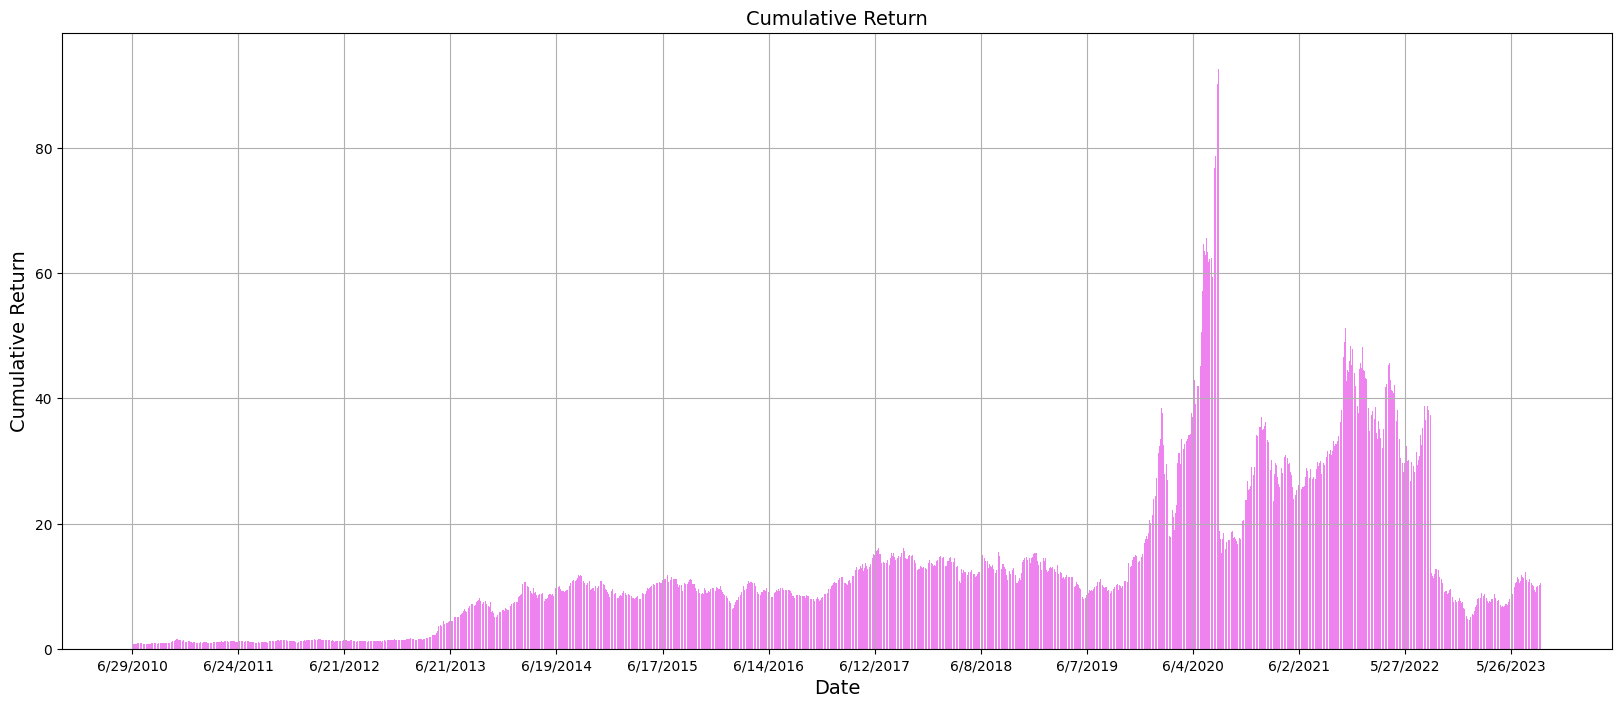

In [18]:
# Calculate the cumulative return
df['Cumulative Return'] = (1 + df['volume']).cumprod()

# Create the bar plot for cumulative return
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['Cumulative Return'], color='violet')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return', fontsize=14)
plt.title('Cumulative Return', fontsize=14)
plt.grid()
plt.show()

In [19]:
df['date'] = pd.to_datetime(df['date'])

# Calander Effect

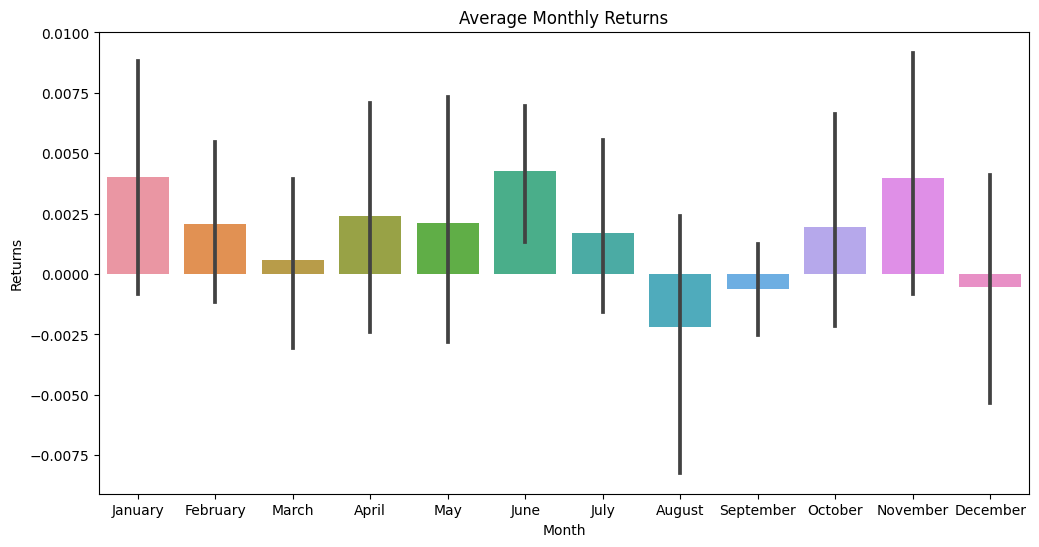

In [20]:
# Calculate the daily returns
df['Return'] = df['close'].pct_change()

# Extract the month and year from the 'date' column
df['Month'] = df['date'].dt.month_name()
df['Year'] = df['date'].dt.year

# Group the data by month and year and calculate the average return
monthly_returns = df.groupby(['Month', 'Year'])['Return'].mean().reset_index()

# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by month order
monthly_returns['Month'] = pd.Categorical(monthly_returns['Month'], categories=month_order, ordered=True)
monthly_returns = monthly_returns.sort_values('Month')

# Create a bar plot of the average monthly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_returns, x='Month', y='Return')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

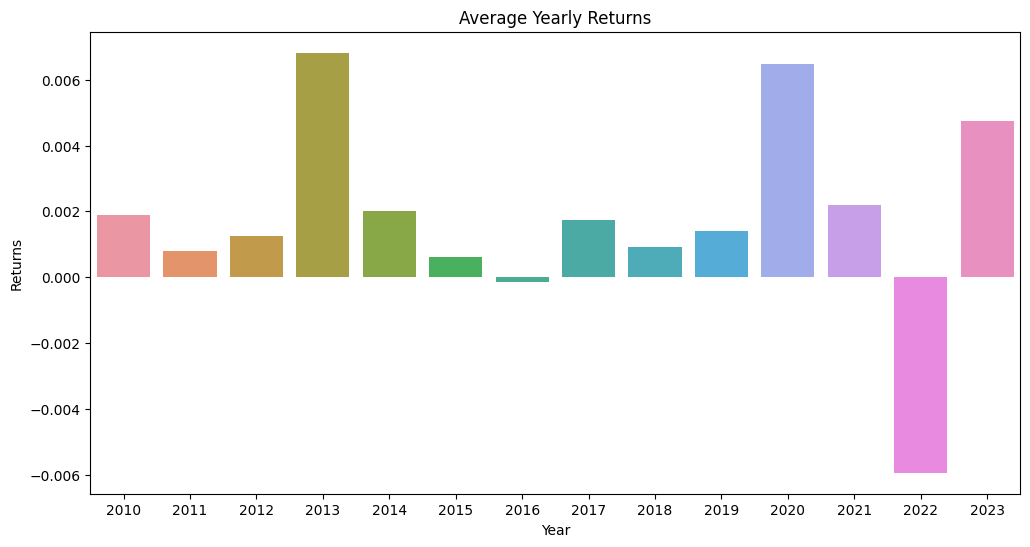

In [21]:
# Extract the year from the 'date' column
df['Year'] = df['date'].dt.year

# Group the data by year and calculate the average return
yearly_returns = df.groupby(['Year'])['Return'].mean().reset_index()

# Sort the data by year
yearly_returns = yearly_returns.sort_values('Year')

# Create a bar plot of the average yearly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_returns, x='Year', y='Return')
plt.title('Average Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

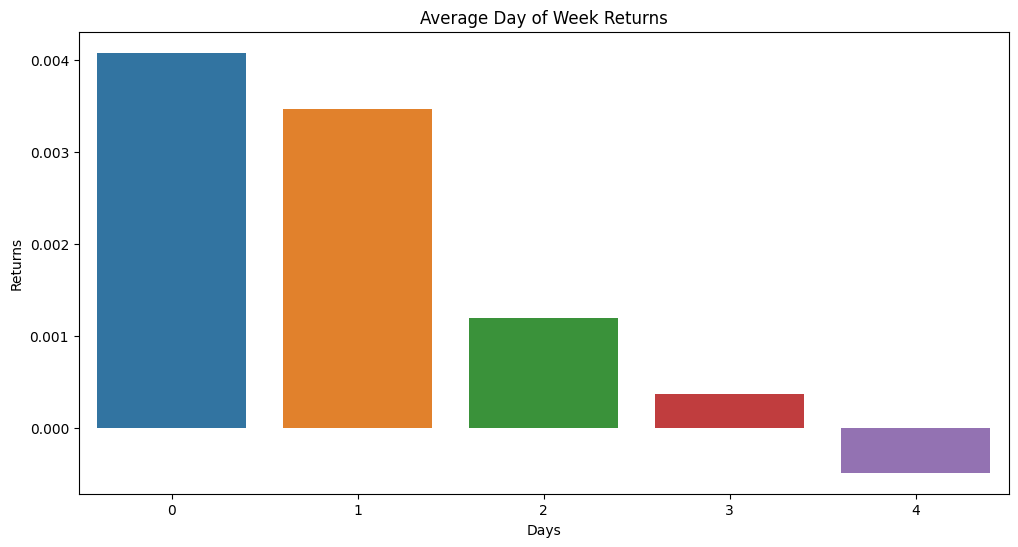

In [22]:
# Extract the day of the week from the 'Date' column
df['Day'] = df['date'].dt.weekday

# Group the data by day of the week and calculate the average return
daily_returns = df.groupby(['Day'])['Return'].mean().reset_index()

# Sort the data by day of the week
daily_returns = daily_returns.sort_values('Day')

# Create a bar plot of the average daily returns
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_returns, x='Day', y='Return')
plt.title('Average Day of Week Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

# Moving averages
In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.
By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated. Simple moving averages (SMAs) use a simple arithmetic average of prices over some timespan, while exponential moving averages (EMAs) place greater weight on more recent prices than older ones over the time period.

Moving averages are calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following or lagging, indicator because it is based on past prices.
The longer the period for the moving average, the greater the lag. A 200-day moving average will have a much greater degree of lag than a 20-day MA because it contains prices for the past 200 days. 50-day and 200-day moving average figures are widely followed by investors and traders and are considered to be important trading signals.

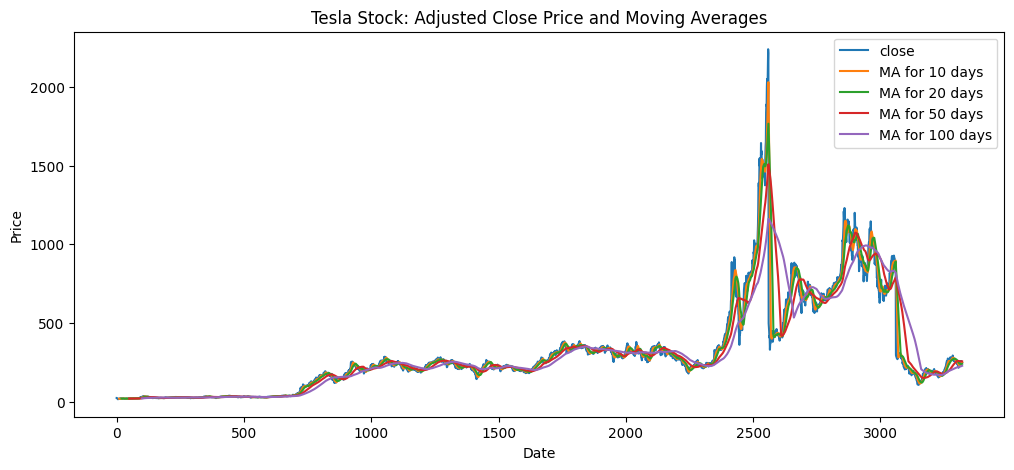

In [23]:
# Calculate moving averages for different windows
df['MA for 10 days'] = df['close'].rolling(10).mean()
df['MA for 20 days'] = df['close'].rolling(20).mean()
df['MA for 50 days'] = df['close'].rolling(50).mean()
df['MA for 100 days'] = df['close'].rolling(100).mean()

# Truncate the data if needed
#The truncate() method in Python resizes the file to a specified size. If no size is given, it uses the current file position.
truncated_data = df.truncate()

# Plot the adjusted close price and moving averages
truncated_data[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12, 5))

# Set the title and axis labels
plt.title('Tesla Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

# Bollinger band
A Bollinger Band® is a technical analysis tool defined by a set of trendlines. They are plotted as two standard deviations, both positively and negatively, away from a simple moving average (SMA) of a security's price and can be adjusted to user preferences.

#### **How to Calculate Bollinger Bands**
The first step in calculating Bollinger Bands® is to compute the simple moving average (SMA) of the security, typically using a 20-day SMA. A 20-day SMA averages the closing prices for the first 20 days as the first data point.

The next data point drops the earliest price, adds the price on day 21 and takes the average, and so on. Next, the standard deviation of the security price will be obtained. Standard deviation is a mathematical measurement of average variance and features prominently in statistics, economics, accounting, and finance.
#### **Rolling Mean**
Pandas **dataframe.rolling()** function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.


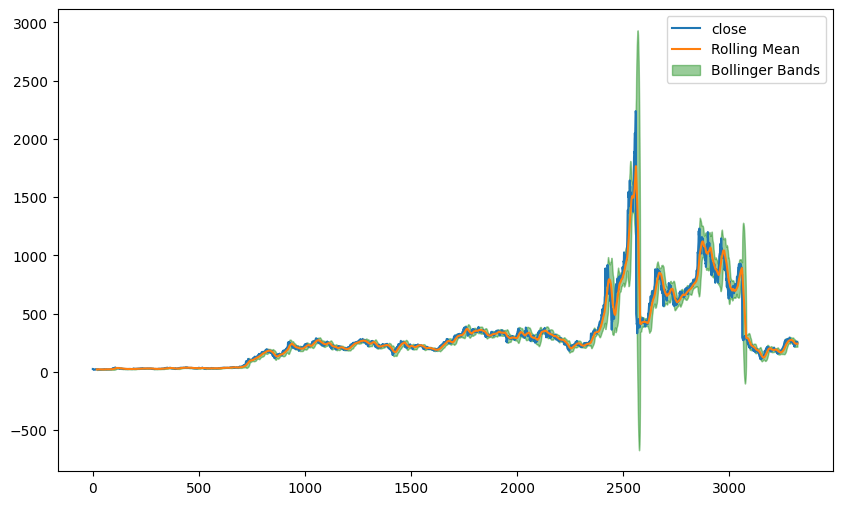

In [24]:
#plotting bollinger band
rolling_mean = df['close'].rolling(window=20).mean()
rolling_std = df['close'].rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.index, df['close'], label='close')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
ax.fill_between(rolling_mean.index, upper_band, lower_band, alpha=0.4, color='green', label='Bollinger Bands')
ax.legend()
plt.show()

#  Tesla Stock movement in the year of 2023

<function matplotlib.pyplot.show(close=None, block=None)>

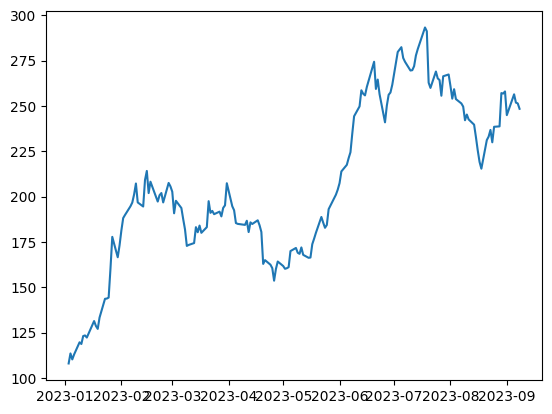

In [25]:
a=df[df['date'] <= '2022-12-31'].index
b=df.drop(a)

plt.plot(b.date,b.close)
plt.show

# Profitable days vs Loss days

<function matplotlib.pyplot.show(close=None, block=None)>

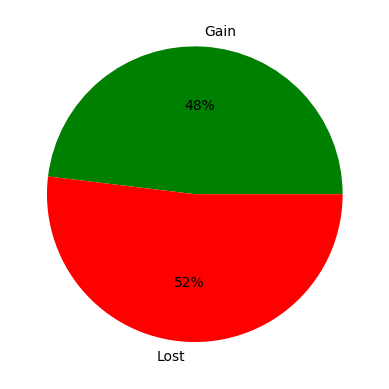

In [26]:
gain=df[df['change_percent']<0]['date'].count()
lost=df[df['change_percent']>0]['date'].count()

labels=['Gain','Lost']
sizes=[gain,lost]
colors=['g','r']
plt.pie(sizes,labels=labels,autopct='%1.f%%',colors=colors)

plt.show

In [27]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM


In [28]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Epoch
An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model.

Another way to define an epoch is the number of passes a training dataset takes around an algorithm. One pass is counted when the data set has done both forward and backward passes.

The number of epochs is considered a hyperparameter. It defines the number of times the entire data set has to be worked through the learning algorithm.

Every sample in the training dataset has had a chance to update the internal model parameters once during an epoch. One or more batches make up an epoch. The batch gradient descent learning algorithm, for instance, is used to describe an Epoch that only contains one batch.

In [29]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
83/83 [==============================] - 2s 10ms/step - loss: 0.0068
Epoch 2/50
83/83 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 3/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 4/50
83/83 [==============================] - 1s 9ms/step - loss: 8.3558e-04
Epoch 5/50
83/83 [==============================] - 1s 11ms/step - loss: 7.7371e-04
Epoch 6/50
83/83 [==============================] - 1s 10ms/step - loss: 8.1049e-04
Epoch 7/50
83/83 [==============================] - 1s 9ms/step - loss: 6.6736e-04
Epoch 8/50
83/83 [==============================] - 1s 10ms/step - loss: 6.7922e-04
Epoch 9/50
83/83 [==============================] - 1s 10ms/step - loss: 5.5078e-04
Epoch 10/50
83/83 [==============================] - 1s 10ms/step - loss: 6.2607e-04
Epoch 11/50
83/83 [==============================] - 1s 10ms/step - loss: 5.6880e-04
Epoch 12/50
83/83 [==============================] - 1s 15ms/step - loss: 6.0158e-04
Epoc

# Train_loss
This loss is a measure of how well the model is performing on the training data, with lower values indicating better performance.
#### **Verbose**
 The verbose parameter controls the level of verbosity in the evaluation output. When set to 0, it means no output will be displayed during evaluation. You can change it to 1 or 2 to get more detailed output if needed.

In [30]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.00033885688753798604
Testing Loss: 0.000625881424639374


In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test)

21/21 [==============================] - 0s 4ms/step


In [32]:
# Inverse transform the predictions to get actual stock prices
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

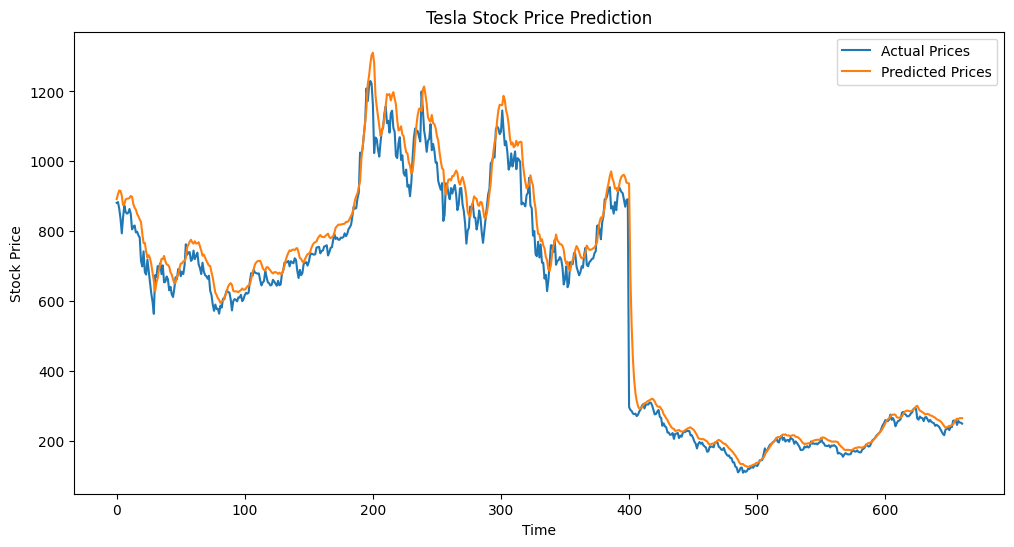

In [33]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()